In [ ]:
# Import libaries

import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from PIL import Image
import numpy as np

In [ ]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory to Google Drive location

os.chdir('/content/drive/My Drive/msds/462/mask-data/')

In [ ]:
# Set appropriate training directory

train_dir = '/content/drive/My Drive/msds/462/mask-data/'

In [ ]:
train_dir

'/content/drive/My Drive/msds/462/cat-dog-test/Train'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32,class_mode='categorical',subset='training')

Found 308 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train_generator)

In [ ]:
print(labels[0])

[1. 0.]


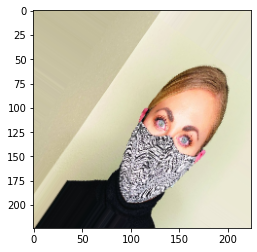

[1. 0.]


In [ ]:
# Show an image in the generator on the screen and the classification value 

x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()
    print(y[i])



In [ ]:
# Create the validation data generator

valiation_generator = train_datagen.flow_from_directory(train_dir,target_size=(224, 224),batch_size=16,class_mode='categorical',subset='validation')

Found 77 images belonging to 2 classes.


In [ ]:
# Create a convolutional base using MobileNetV2
from keras.applications import MobileNetV2

conv_base = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
# Create the additional model layers 

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='categorical_crossentropy',metrics=['acc'])


In [ ]:
# Freeze the bottom layers of the convolutional model. Allow the top layer weights to adjust based on model training

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
      set_trainable = True
      if set_trainable:
          layer.trainable = True
      else:
          layer.trainable = False

In [ ]:
# Perform model training on the dataset

history = model.fit(train_generator, epochs=5, validation_data=valiation_generator)

Epoch 1/5
10/10 [==============================] - 223s 22s/step - loss: 0.7659 - acc: 0.7500 - val_loss: 0.2486 - val_acc: 0.8831
Epoch 2/5
10/10 [==============================] - 10s 979ms/step - loss: 0.1684 - acc: 0.9221 - val_loss: 0.2207 - val_acc: 0.9221
Epoch 3/5
10/10 [==============================] - 10s 976ms/step - loss: 0.1793 - acc: 0.9253 - val_loss: 0.1603 - val_acc: 0.9481
Epoch 4/5
10/10 [==============================] - 10s 981ms/step - loss: 0.1434 - acc: 0.9318 - val_loss: 0.1321 - val_acc: 0.9481
Epoch 5/5
10/10 [==============================] - 10s 981ms/step - loss: 0.0809 - acc: 0.9838 - val_loss: 0.0842 - val_acc: 0.9610


In [ ]:
# Display the model details

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16056576  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 18,315,074
Trainable params: 18,280,962
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
# Save the model back to Google Drive
model.save('/content/drive/My Drive/msds/462/mask-classifier/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/msds/462/model_save_2/assets


In [ ]:
img_1 = image.load_img('/content/drive/My Drive/msds/462/Test/Test/face_mask_test1.jpg', target_size=(224, 224))

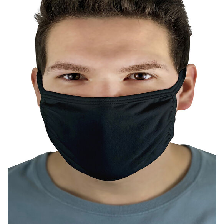

In [ ]:
img_1

In [ ]:
img_tensor_1 = image.img_to_array(img_1)

In [ ]:
img_tensor_1 = np.expand_dims(img_tensor_1, axis=0)

In [ ]:
model.predict(img_tensor_1)

array([[0.51382375, 0.48617628]], dtype=float32)

In [ ]:
img_2 = image.load_img('/content/drive/My Drive/msds/462/Test/Test/no_face_mask_test1.jpg', target_size=(224, 224))

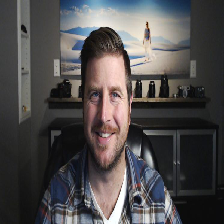

In [ ]:
img_2

In [ ]:
img_tensor_2 = image.img_to_array(img_2)
img_tensor_2 = np.expand_dims(img_tensor_2, axis=0)

In [ ]:
model.predict(img_tensor_2)

array([[0.01962173, 0.9803783 ]], dtype=float32)